In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import SGDClassifier
import math
from io import StringIO
import sys

In [121]:
np.random.seed(0)

In [122]:
def readData():
    ''' Used to read the data from the csv format file into a pandas dataframe
        return a pandas DataFrame
    '''
    df = pd.read_csv('./data/diabetes.csv') #read the csv file data into the pandas dataframe
    return df

In [123]:
def showDataPlots(dataset):
    sbn.boxplot(dataset.Glucose)
    plt.savefig('./plots/Q2/gluc_box.png', facecolor='white', transparent=False)
    plt.show()
    sbn.boxplot(dataset.BloodPressure)
    plt.savefig('./plots/Q2/bp_box.png', facecolor='white', transparent=False)
    plt.show()
    sbn.boxplot(dataset.SkinThickness)
    plt.savefig('./plots/Q2/thick_box.png', facecolor='white', transparent=False)
    plt.show()
    sbn.boxplot(dataset.Insulin)
    plt.savefig('./plots/Q2/insulin_box.png', facecolor='white', transparent=False)
    plt.show()
    sbn.boxplot(dataset.BMI)
    plt.savefig('./plots/Q2/bmi_box.png', facecolor='white', transparent=False)
    plt.show()

In [124]:
def plotHistogram(dataset):
    sbn.histplot(dataset.Pregnancies)
    plt.savefig('./plots/Q2/preg_hist.png', facecolor='white', transparent=False)
    plt.show()
    sbn.histplot(dataset.Glucose)
    plt.savefig('./plots/Q2/gluc_hist.png', facecolor='white', transparent=False)
    plt.show()
    sbn.histplot(dataset.BloodPressure)
    plt.savefig('./plots/Q2/bp_hist.png', facecolor='white', transparent=False)
    plt.show()
    sbn.histplot(dataset.SkinThickness)
    plt.savefig('./plots/Q2/thick_hist.png', facecolor='white', transparent=False)
    plt.show()
    sbn.histplot(dataset.Insulin)
    plt.savefig('./plots/Q2/insulin_hist.png', facecolor='white', transparent=False)
    plt.show()
    sbn.histplot(dataset.BMI)
    plt.savefig('./plots/Q2/bmi_hist.png', facecolor='white', transparent=False)
    plt.show()
    sbn.histplot(dataset.DiabetesPedigreeFunction)
    plt.savefig('./plots/Q2/dpf_hist.png', facecolor='white', transparent=False)
    plt.show()
    sbn.histplot(dataset.Age)
    plt.savefig('./plots/Q2/age_hist.png', facecolor='white', transparent=False)
    plt.show()

In [125]:
def getColumnMean(dataset, column):
    mean_value = dataset[column].mean()
    return mean_value

In [126]:
def split_test_train(feature_df, output_df, val_size):
    ''' Used to split the dataset into training set, testing set and validation set.
        Input are two pandas data-based objects, feature_df: feature(input data) and output_df: the outcome(output/result) data, 
        And val_size : a positive float value in range [0,1] representing ratio of validation data size to the whole dataset
        Returns six numpy arrays : train_feature - Training feature(input) data, val_feature - Validation feature(input) data, 
        test_feature - Testing feature(input) data, train_Y - Training result/output data, val_Y - Validation result/output data, test_Y - Testing result/output data
    '''

    feature_data = np.array(feature_df) #convert to numpy ndarray
    output_data = np.array(output_df) #convert to numpy ndarray
    M = feature_data.shape[0]

    num_val_sample = math.ceil(val_size * (M)) #calculating the validation dataset size which is val_size times total dataset size
    num_test_sample = math.ceil((M - num_val_sample) / 8.0) #calculation testing data size, it will be one-eighth size of the modified dataset (modified dataset is one which we got by removing the validation samples from whole dataset)
    num_train_sample = M - num_test_sample - num_val_sample #calcualting the trainging data size

    #slicing operations to form training, validation, testing splits.
    train_feature = feature_data[:num_train_sample]  #splitting and extracting training input feature data from the whole feature data
    train_Y = output_data[:num_train_sample] #splitting and extracting training output result data from the whole output result data

    test_feature = feature_data[num_train_sample:num_train_sample + num_test_sample]  #splitting and extracting testing input feature data from the whole feature data
    test_Y = output_data[num_train_sample:num_train_sample + num_test_sample] #splitting and extracting testing output result data from the whole output result data

    val_feature = feature_data[num_train_sample + num_test_sample:]  #splitting and extracting validation input feature data from the whole feature data
    val_Y = output_data[num_train_sample + num_test_sample:] #splitting and extracting validation output result data from the whole output result data

    return train_feature, val_feature, test_feature, train_Y, val_Y, test_Y


In [127]:
def extractFeatureAndSplit(dataset):
    ''' Used to split the dataframe into input(features data) and the outcome(output result data). After that, the dataset is splitted into training, validation and testing set.
        Input :  A pandas dataframe object with the dataset
        Returns : six numpy arrays in the order : Training Feature Data, Validation Feature Data, Testing Feature Data, Training Output/Result Data, Validation Output/Result Data, Testing Output/Result Data
    '''
    featureData = dataset.drop('Outcome', axis='columns') #Extract and store the input feature data in featureData.Dropped the column 'Outcome' as it is the output/result column.
    Y_actual = dataset['Outcome'] #Similarly extract and store the ouput/result data ('Outcome' column) into the Y_actual

    train_feature_data, val_feature_data, test_feature_data, train_actual_output, val_actual_output, test_actual_output = split_test_train(featureData, Y_actual, 0.2) #split the dataset into training, testing and validation

    return train_feature_data, val_feature_data, test_feature_data, train_actual_output, val_actual_output, test_actual_output


In [128]:
def processDataset():
    ''' The major function to handle all sorts of data operations from reading, extracting, splitting it, pre-processing, formatting/transforming the data 
        according to our requirement.
        Returns : six numpy arrays in the order : Training Feature Data, Validation Feature Data, Testing Feature Data, Training Output/Result Data, Validation Output/Result Data, Testing Output/Result Data
    '''
    dataset = readData() #read the dataset

    # plotHistogram(dataset)
    
    # print("Original dataset")
    # showDataPlots(dataset) #seeing the boxplot of some of the features
    
    #We can see there are some zero values in the columns : glucose, blood pressure, skin thickness, insulin and bmi. These are not valid data as it can be clearly deduced. We are replacing them with its mean to bring it to some central tendency.
    glucose_mean = getColumnMean(dataset, "Glucose")
    dataset["Glucose"].replace(to_replace=0, value=glucose_mean, inplace=True)
    BloodPressure_mean = getColumnMean(dataset, "BloodPressure")
    dataset["BloodPressure"].replace(to_replace=0, value=BloodPressure_mean, inplace=True)
    SkinThickness_mean = getColumnMean(dataset, "SkinThickness")
    dataset["SkinThickness"].replace(to_replace=0, value=SkinThickness_mean, inplace=True)
    Insulin_mean = getColumnMean(dataset, "Insulin")
    dataset["Insulin"].replace(to_replace=0, value=Insulin_mean, inplace=True)
    bmi_mean = getColumnMean(dataset, "BMI")
    dataset["BMI"].replace(to_replace=0, value=bmi_mean, inplace=True)


    train_feature_data, val_feature_data, test_feature_data, train_actual_output, val_actual_output, test_actual_output = extractFeatureAndSplit(dataset) #extracting the inputs and output features from dataframe.

    #Note : I convert all the splitted sets returned to numpy arrays and take the transpose of it 
    input_train = np.transpose(np.array(train_feature_data))
    input_test = np.transpose(np.array(test_feature_data))
    input_validation = np.transpose(np.array(val_feature_data))
    Y_actual_train = np.transpose(np.array(train_actual_output))
    Y_actual_test = np.transpose(np.array(test_actual_output))
    Y_actual_validation = np.transpose(np.array(val_actual_output))


    num_features = input_train.shape[0] #total number of features
    num_data_train = input_train.shape[1] #number of training samples
    num_data_test = input_test.shape[1] #number of testing samples
    num_data_val = input_validation.shape[1] #number of validation samples

    #Performing min-max normalization for all the feature data (input data). For every value in evey column (let it be x), then change it to :
    #       x = x - (column_min) / (column_max - column_min)
    for i in range(num_features):
        col_min = np.min(input_train[i])
        col_max = np.max(input_train[i])
        input_train[i] = (input_train[i] - col_min) / (col_max - col_min)
    for i in range(num_features):
        col_min = np.min(input_test[i])
        col_max = np.max(input_test[i])
        input_test[i] = (input_test[i] - col_min) / (col_max - col_min)
    for i in range(num_features):
        col_min = np.min(input_validation[i])
        col_max = np.max(input_validation[i])
        input_validation[i] = (input_validation[i] - col_min) / (col_max - col_min)
    
    #converting the types of numpy ndarrays to np.float64 to avoid any overflow issues
    input_train = input_train.astype(np.float64)
    input_test = input_test.astype(np.float64)
    input_validation = input_validation.astype(np.float64)
    Y_actual_train = Y_actual_train.astype(np.float64)
    Y_actual_test = Y_actual_test.astype(np.float64)
    Y_actual_validation = Y_actual_validation.astype(np.float64)

    #reshapping the arrays to match my format of representing the outcome data.
    Y_actual_train = Y_actual_train.reshape((1, num_data_train))
    Y_actual_test = Y_actual_test.reshape((1, num_data_test))
    Y_actual_validation = Y_actual_validation.reshape((1, num_data_val))

    #insert a row of zeros in the input/feature dataset for train. test and validation to handle the added parameter term.
    input_train = np.insert(input_train, input_train.shape[0], values=1, axis=0)
    input_test = np.insert(input_test, input_test.shape[0], values=1, axis=0)
    input_validation = np.insert(input_validation, input_validation.shape[0], values=1, axis=0)

    return input_train, input_validation, input_test, Y_actual_train, Y_actual_validation, Y_actual_test

Logistic Regression

In [129]:
def sigmoidFunction(Z):
    ''' This function is used to calculate the sigmoid value for a given Z(Z is a numpy array)
        Input : a numpy array ,(1xM) where M is no.of samples,having value which is the argument for the sigmoid calculation part
        Return : sigmoid function value of Z
    '''
    sigmoid_Z = 1 / (1 + np.exp(-1*Z)) #applying the formula of sigmoid
    return sigmoid_Z

In [130]:
def getPredictedValue(X, theta):
    ''' This function is used to find the predicted value given an input X and a theta value. The function first finds the dot product of theta transpose with input feature matrix X. 
        Then it passes it the sigmoid function whose return value will be the Ypredicted .This is done to scale outcomes between 0 and 01
        Input : X - numpy nd array containing the input feature data in column vector format (one column is one sample). 
        Also a theta : parameter (coefficients) of size Nx1, where N is number of features (including the column of all zeros inserted).
        Returns : A numpy ndarray Y_predicted having the predicted values corresponding to each column(sample) in the input matrix X.It is of size 1xM where M is number of samples (comlumns) in input parameter X. 
    '''
    theta_transpose = np.transpose(theta) #finding transpose of theta
    z_value = np.dot(theta_transpose, X)
    sigmoid_value = sigmoidFunction(z_value) #taking sigmoid of the dot product of theta transpose and input feature X.
    Y_predicted = sigmoid_value

    return Y_predicted

In [131]:
def getCost(Y, Y_hat):
    ''' This function is used to find the log loss (logistic regression case) given the original output/result values and the prediciton values.
        Input : Y_hat - the predicted values, Y - the actual true results/values corresponding to the predicted values.Sizes of both are (1 X K) where K = no. of samples you have predicted the outcome for.
        Return : cost : the loss value
    '''
    M = Y.shape[1]
    loss_terms = (Y * np.log(Y_hat)) + ((1 - Y)*np.log(1 - Y_hat)) #expression inside the sigma for the log loss
    cost = (-1 * np.sum(loss_terms)) / M  #multiplyin the sum of all such terms in the end by (-1/M)

    return cost

In [132]:
def performBatchGradientDescent(curr_theta, alpha, X_train, Y_train):
    ''' The batch gradient descent function. Used to perform one iteration of the gradient descent algorithm.The functions calculates 
        the gradient with respect to a particular input(X) and output(Y) sample.
        Input : curr_theta - the current value of theta(coefficients) before performing an iteration of gradient descent, alpha - learning rate,
              X, Y - user gives valid feature data(X) and valid output data(Y) 
        Returns: updated_theta - the updated value of theta/coefficients after performing one iteration of gradient descent
    '''

    M = X_train.shape[1]
    Y_hat = getPredictedValue(X_train, curr_theta) #firstly find the predicted value using the training sample and a current value of theta
    dJ_theta = (np.dot(X_train, np.transpose((Y_hat - Y_train)))) / (M) #calculate the gradient term which is partial derivative of cost wrt to theta.
    updated_theta = curr_theta - (alpha * dJ_theta) #update theta using the value of the gradient and the learning rate(alpha)

    return updated_theta


In [133]:
def performStochasticGradientDescent(curr_theta, alpha, X_train, Y_train, X_validation, Y_validation):
    ''' The function is used to perform SGD in a particualr epoch. The function firstly randomly shuffles the training sets to and iterates over the shuffled 
        training set picking one sample at a time to update the value of theta.
        Input parameters: curr_theta - the current value of theta(coefficients) before performing an iteration of gradient descent, alpha - learning rate,
        (X_train, Y_train) - Training dataset, (X_validation, Y_validation) - Validation dataset
        Returns :  updated_theta - the updated value of theta/coefficients after performing gradient descent, train_cost_values - log loss values on training set calculated
        during the iterations here, validation_cost_values - log loss values on validation set calulated suring iterations here
    '''
    N, M = X_train.shape
    shuffledPermutation = np.random.permutation(M) #create a random permutation of (1 to M)
    shuffled_X_train = X_train[:, shuffledPermutation] #shuffled the training feature (input) dataset
    shuffled_Y_train = Y_train[:, shuffledPermutation] #shuffled the training result/output dataset

    train_cost_values = [] #list created to hold the training's loss during the iterations of SGD
    validation_cost_values = [] #lists created to hold the validations's loss during the iterations of SGD

    for i in range(M): #iterate over all the M samples in randomly shuffled arrays
        
        x_train_i = (shuffled_X_train[:, i]).reshape((N, 1)) #i^th sample feature(input) data from shuffled training dataset
        y_train_i = shuffled_Y_train[0][i].reshape((1, 1)) #i^th sample output data from shuffled training dataset
        
        iter_train_cost_value = getCost(Y_train, getPredictedValue(X_train, curr_theta)) #finding the training set's loss for the particular iteration
        train_cost_values.append(iter_train_cost_value)
        iter_val_cost_value = getCost(Y_validation, getPredictedValue(X_validation, curr_theta)) #finding the validation set's loss for the particular iteration
        validation_cost_values.append(iter_val_cost_value)

        curr_theta = performBatchGradientDescent(curr_theta, alpha, x_train_i, y_train_i)  #Please note that this is not like performing BGD or anything, its simply that I use my pre implemented function to normally just update theta and perform one move of gradient descent using one training sample as an input
    
    updated_theta = curr_theta #get the updated theta value

    return updated_theta, train_cost_values, validation_cost_values


In [134]:
def plotStochastic(training_loss_list, validation_loss_list):
        ''' Function used to plot the loss vs iterations plot for SGD
        '''

        #training loss vs iterations plot
        plt.plot(training_loss_list, color='blue')
        plt.xlabel("Iterations")
        plt.ylabel("loss")
        plt.title("Training Loss vs Iterations (Stochastic)")
        plt.show()
        
        #validation loss vs iterations plot
        plt.plot(validation_loss_list, color='red')
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.title("Validation Loss vs Iterations (Stochastic)")
        plt.show()

        #combined plot for analysis
        plt.plot(training_loss_list, label='train-loss', color='blue')
        plt.plot(validation_loss_list, label='validation-loss', color='red')
        plt.legend()
        plt.title('Using Stochastic Gradient Descent')
        plt.xlabel('iterations')
        plt.ylabel('Loss')
        plt.show()
    

In [135]:
def plotBatch(training_loss_list, validation_loss_list):
        ''' Function used to plot the loss vs iterations plot for SGD
        '''
        #training loss vs iterations plot
        plt.plot(training_loss_list, color='blue')
        plt.xlabel("Iterations")
        plt.ylabel("loss")
        plt.title("Training Loss vs Iterations (Batch)")
        plt.show()
        
        #validation loss vs iterations plot
        plt.plot(validation_loss_list, color='red')
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.title("Validation Loss vs Iterations (Batch)")
        plt.show()

        #combined plot for analysis
        plt.plot(training_loss_list, label='train-loss', color='blue')
        plt.plot(validation_loss_list, label='validation-loss', color='red')
        plt.legend()
        plt.title('Using Batch Gradient Descent')
        plt.xlabel('iterations')
        plt.ylabel('Loss')
        plt.show()

In [136]:
def performLogisticRegression(X_train, Y_train, number_of_epochs, alpha_value, gd_type, X_validation, Y_validation):
    
    ''' This function is the main function that performs logistic regression. Uses the gradient descent functions (SGD or BGD) depending on the choice and runs 
        for certain number of epochs to perform logistic regression and find a estimate for the best model coefficients.
        Input : (X_train, Y_train) - Training set, (X_validation, Y_validation) - Validation Set
                number_of_epochs is the number of epochs for the algorithm to perform gradient descent.
                alpha_value : The learning rate for the model
                gd_type :"batch" or "stochastic" depending on type
    '''
    num_epochs = number_of_epochs
    learning_rate = alpha_value #the learning rate for the model

    theta_params = np.random.rand(X_train.shape[0], 1) #a randomly initialized numpy ndarray to hold the model coefficients in column wise form.

    train_loss_list = [] #list created to hold the training's losses.
    validation_loss_list = [] #list created to hold the validation's losses.
    if(gd_type == "batch"): #check if gd_type is "batch" 
        for i in range(num_epochs):
            predicted_value_train = getPredictedValue(X_train, theta_params) #finding the predicted value using current value of theta and the training input dataset
            iteration_cost_train = getCost(Y_train, predicted_value_train) #finding the loss corresponding to training set's prediciton.
            train_loss_list.append(iteration_cost_train)

            predicted_value_validation = getPredictedValue(X_validation, theta_params) #finding the predicted value using current value of theta and the training input dataset
            iteration_cost_validation = getCost(Y_validation, predicted_value_validation)#finding the loss corresponding to validation set's prediciton.
            validation_loss_list.append(iteration_cost_validation)
            
            update_theta = performBatchGradientDescent(theta_params, learning_rate, X_train, Y_train) #finding the updated value of theta
            
            theta_params = update_theta #updating the current value of theta
        plotBatch(train_loss_list, validation_loss_list)


    if(gd_type == "stochastic"):

        for i in range(num_epochs):
            update_theta, train_cost_value, validation_cost_value = performStochasticGradientDescent(theta_params, learning_rate, X_train, Y_train, X_validation, Y_validation) #performing SGD during the epoch
            train_loss_list.extend(train_cost_value) #Appending all the training losses calculated during all iterations in SGD to the list
            validation_loss_list.extend(validation_cost_value) #Appending all the validation losses calculated during all iterations in SGD to the list
            theta_params = update_theta
        
        plotStochastic(train_loss_list, validation_loss_list)
        
    return theta_params



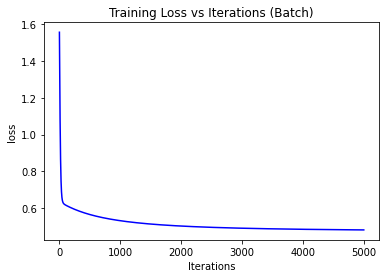

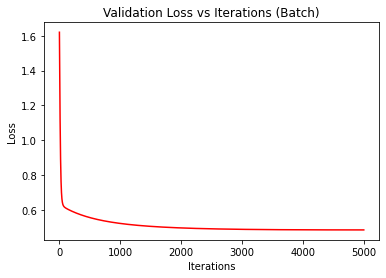

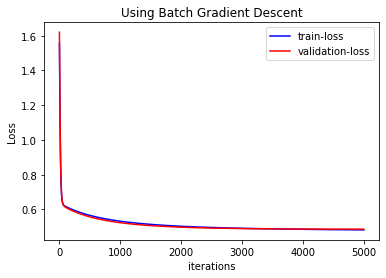

In [137]:
# A block to check the working of BGD

input_train, input_validation, input_test, Y_actual_train, Y_actual_validation, Y_actual_test = processDataset()
model_parameters_batch = performLogisticRegression(input_train, Y_actual_train, 5000, 0.1, "batch", input_validation, Y_actual_validation)

Y_prediction_train_batch = getPredictedValue(input_train, model_parameters_batch)
Y_prediction_test_batch = getPredictedValue(input_test, model_parameters_batch)

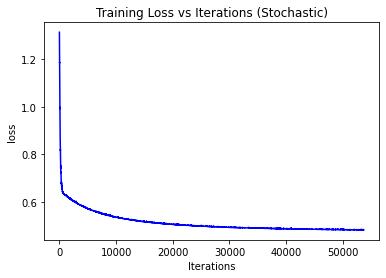

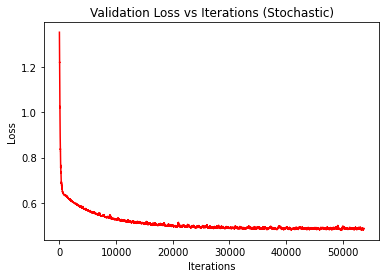

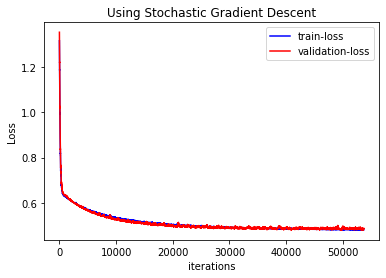

In [138]:

#A block to check the working of SGD
model_parameters_stoch = performLogisticRegression(input_train, Y_actual_train, 100, 0.01, "stochastic", input_validation, Y_actual_validation)

Y_prediction_train_stoch = getPredictedValue(input_train, model_parameters_stoch)
Y_prediction_test_stoch = getPredictedValue(input_test, model_parameters_stoch)

Q2.1(B)

Alpha Value : 0.01


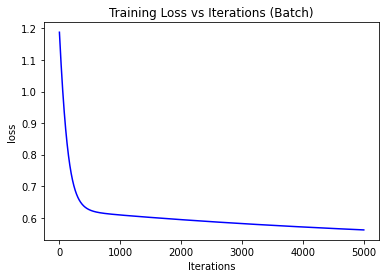

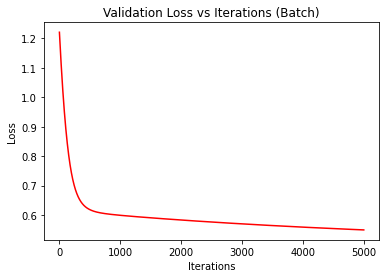

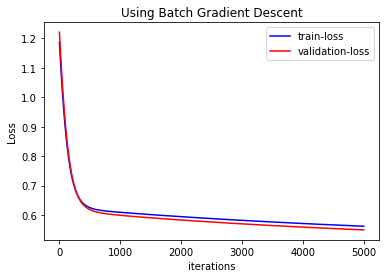

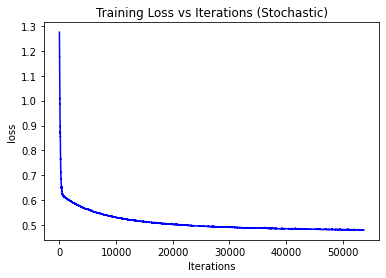

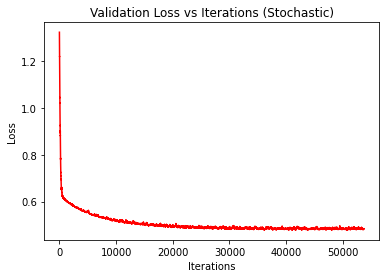

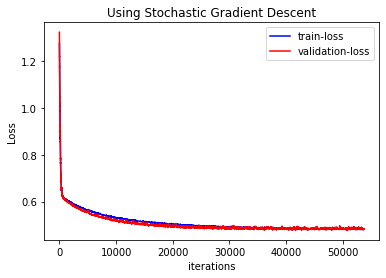

Alpha Value : 0.0001


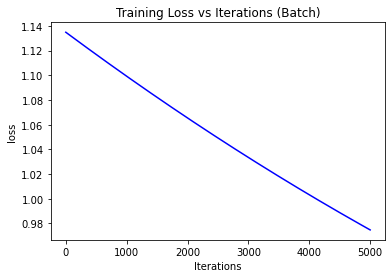

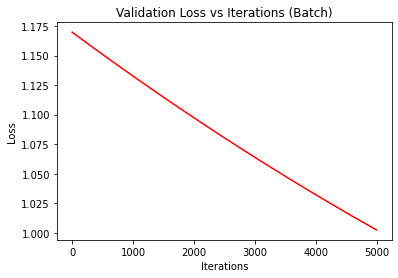

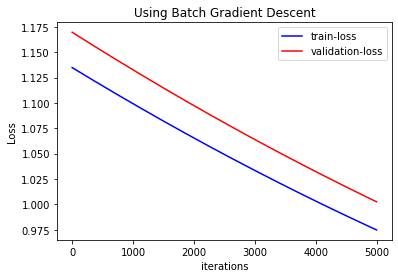

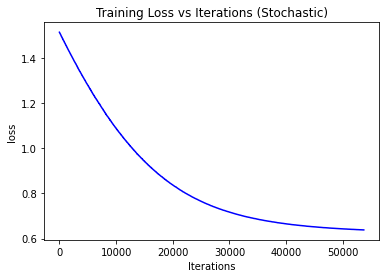

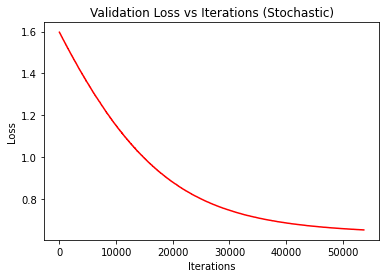

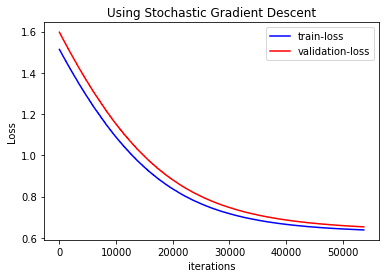

Alpha Value : 10


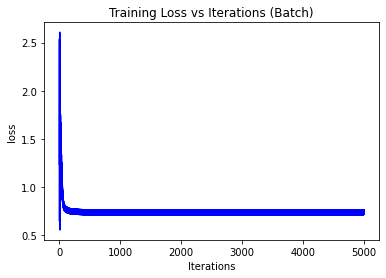

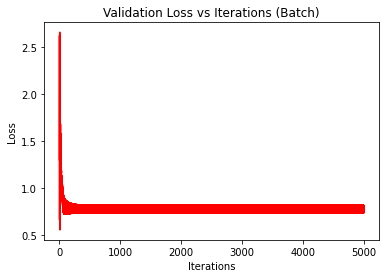

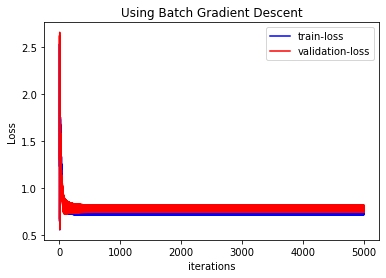

C:\Users\SAMYAK~1\AppData\Local\Temp/ipykernel_30852/4086462363.py:7: RuntimeWarning: divide by zero encountered in log
  loss_terms = (Y * np.log(Y_hat)) + ((1 - Y)*np.log(1 - Y_hat)) #expression inside the sigma for the log loss
C:\Users\SAMYAK~1\AppData\Local\Temp/ipykernel_30852/4086462363.py:7: RuntimeWarning: invalid value encountered in multiply
  loss_terms = (Y * np.log(Y_hat)) + ((1 - Y)*np.log(1 - Y_hat)) #expression inside the sigma for the log loss


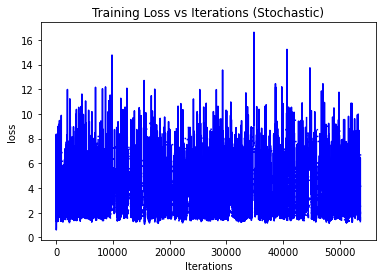

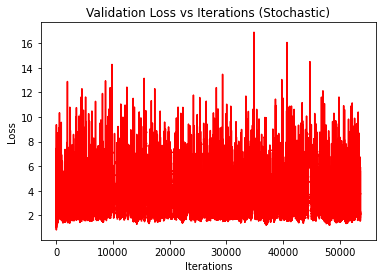

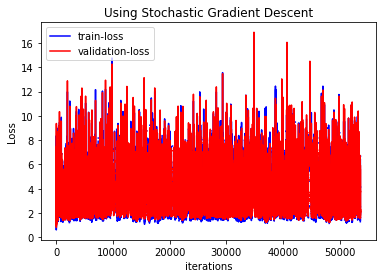

In [139]:
learning_rates = [0.01, 0.0001, 10] #the list of learning rates
for alpha in learning_rates:
    sys.stdout = set_stdout_state
    print(f'Alpha Value : {alpha}')
    theta_batch = performLogisticRegression(input_train, Y_actual_train, 5000, alpha, "batch", input_validation, Y_actual_validation)
    theta_stoch = performLogisticRegression(input_train, Y_actual_train, 100, alpha, "stochastic", input_validation, Y_actual_validation)

Q2.1 (C)

In [140]:
def calculateConfusionMatrix(prediction_values, actual_values):
    ''' The function is used to calculate the confusion matrix for the given model's predictions.
        Input : prediction_values : numpy ndarray containing predicted values for a particular input feature datatset, actual_values - corresponding true label values
        Returns : confusion matrix : A 2x2 confusion matrix
    '''
    confusion_matrix = np.zeros((2, 2)) #initialize confusion matrix
    Y_predicted = (np.round(prediction_values)).reshape((prediction_values.shape[1],)) #round all the prediction values to make ot 0 or 1.
    Y_actual = (actual_values).reshape((actual_values.shape[1],))
    confusion_matrix[0, 0] = np.sum((Y_predicted == Y_actual) & (Y_actual == 1)) #calculating True Positives (both predicted value and actual value is 1)
    confusion_matrix[0, 1] = np.sum((Y_predicted != Y_actual) & (Y_actual == 0)) #calculating False Positives (actual value is 0 predicted value is 1)
    confusion_matrix[1, 0] = np.sum((Y_predicted != Y_actual) & (Y_actual == 1)) #calculating False Negatives (actual value is 1 predicted value is 0)
    confusion_matrix[1, 1] = np.sum((Y_predicted == Y_actual) & (Y_actual == 0)) #calculating True Negatives (both predicted and actual value is 0)

    return confusion_matrix



In [141]:
def calculateMetrics(conf_matrix):
    ''' The function is used to calculate all the four model performance stats which includes accuracy, precision, recall, f1_score
        Input : conf_matrix : a 2x2 confusion matrix
        Returns : Four floating point values accuracy, precision, recall and f1_score respectively.
    '''
    true_pos = conf_matrix[0, 0]
    true_neg = conf_matrix[1, 1]
    false_pos = conf_matrix[0, 1]
    false_neg = conf_matrix[1, 0]
    accuracy = (float(true_pos + true_neg)) / (float(true_pos + true_neg + false_pos + false_neg)) 
    precision = (float(true_pos)) / (float(true_pos + false_pos))
    recall = (float(true_pos)) / (float(true_pos + false_neg))
    f1_score = float(2 * precision * recall) / float(precision + recall)

    return accuracy, precision, recall, f1_score

In [142]:
def plotConfusionMatrix(confusion_matrix):
    ''' this function is used to plot the confusion matrix
        Input: confusion_matrix : A 2x2 matrix representing confusion matrix 
    '''
    rot_conf_matrix = np.zeros((2,2))
    rot_conf_matrix[1, 1] = confusion_matrix[0, 0]
    rot_conf_matrix[0, 1] = confusion_matrix[0, 1]
    rot_conf_matrix[1, 0] = confusion_matrix[1, 0]
    rot_conf_matrix[0, 0] = confusion_matrix[1, 1]
    sbn.heatmap(rot_conf_matrix, annot=True, cmap='Blues')
    plt.xlabel('Predicted Value')
    plt.ylabel('Actual Value')
    plt.title('Confusion Matrix')
    plt.show()

Confusion Matrix For BGD


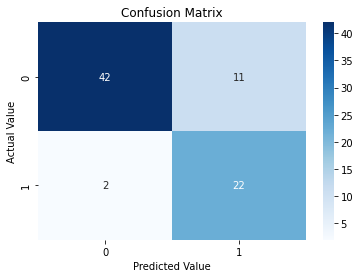

Batch Gradient Descent
Accuracy : 0.8311688311688312
Precision : 0.6666666666666666
Recall : 0.9166666666666666
F1-Score : 0.7719298245614035



In [143]:
# A block to check the confusion matrix for BGD
confusion_matrix_test_batch = calculateConfusionMatrix(Y_prediction_test_batch, Y_actual_test)
accuracy_test_batch, precision_test_batch, recall_test_batch, f1_score_test_batch = calculateMetrics(confusion_matrix_test_batch)
sys.stdout = set_stdout_state
print('Confusion Matrix For BGD')
plotConfusionMatrix(confusion_matrix_test_batch)
sys.stdout = set_stdout_state
print(f'Batch Gradient Descent\nAccuracy : {accuracy_test_batch}\nPrecision : {precision_test_batch}\nRecall : {recall_test_batch}\nF1-Score : {f1_score_test_batch}\n')


Confusion Matrix for SGD


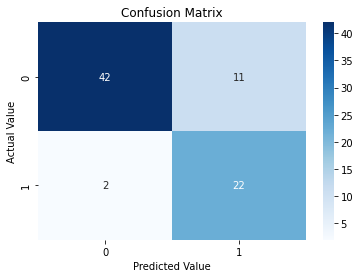

Stochastic Gradient Descent
Accuracy : 0.8311688311688312
Precision : 0.6666666666666666
Recall : 0.9166666666666666
F1-Score : 0.7719298245614035



In [144]:
# A block to check the confusion matrix for SGD

confusion_matrix_test_stoch = calculateConfusionMatrix(Y_prediction_test_stoch, Y_actual_test)
accuracy_test_stoch, precision_test_stoch, recall_test_stoch, f1_score_test_stoch = calculateMetrics(confusion_matrix_test_stoch)
sys.stdout = set_stdout_state
print('Confusion Matrix for SGD')
plotConfusionMatrix(confusion_matrix_test_stoch)
sys.stdout = set_stdout_state
print(f'Stochastic Gradient Descent\nAccuracy : {accuracy_test_stoch}\nPrecision : {precision_test_stoch}\nRecall : {recall_test_stoch}\nF1-Score : {f1_score_test_stoch}\n')


----------------------------------------------------------------------Q2.2 --------------------------------------------------------------------

Confusion Matrix for inbuilt SGD


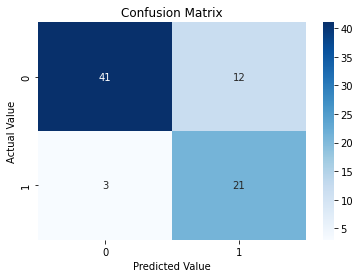

In-built SGD
Accuracy : 0.8051948051948052
Precision : 0.6363636363636364
Recall : 0.875
F1-Score : 0.7368421052631579



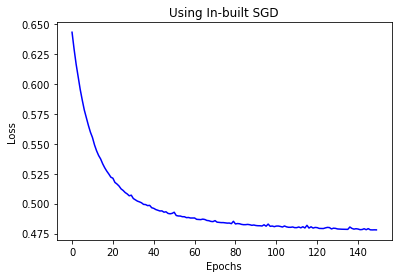

In [145]:
def perform_inbuilt_sgd(X_train, Y_train, X_test, Y_test, epochs, alpha_init):
    ''' In built SGDClassifier is used to perform inbuilt SGD in the function.
        returns a list of losses for all epochs
    '''
    label_list = [0, 1]
    labels = np.array(label_list)
    sgd_model = SGDClassifier(loss = 'log', learning_rate='constant', eta0=alpha_init)
    sk_sgd_epoch_loss = []
    orig_train_X = np.transpose(X_train)
    orig_train_Y =  Y_train.reshape((Y_train.shape[1], ))

    for epoch in range(epochs):
        sgd_model.partial_fit(orig_train_X, orig_train_Y, classes=labels)
        predicted_Y_probab = sgd_model.predict_proba(orig_train_X)
        predicted_Y_probab_one = np.transpose(predicted_Y_probab)[1].reshape((1, Y_train.shape[1]))
        epoch_loss = getCost(Y_train, predicted_Y_probab_one)
        sk_sgd_epoch_loss.append(epoch_loss)
    
    Y_predict_inb_sgd = sgd_model.predict_proba(np.transpose(X_test))
    Y_predict_prob_one = np.transpose(Y_predict_inb_sgd)[1].reshape((1, Y_test.shape[1]))
    confusion_matrix_inbuilt = calculateConfusionMatrix(Y_predict_prob_one, Y_test)
    accuracy_inbuilt, precision_inbuilt, recall_inbuilt, f1_score_inbuilt = calculateMetrics(confusion_matrix_inbuilt)
    print('Confusion Matrix for inbuilt SGD')
    plotConfusionMatrix(confusion_matrix_inbuilt)
    print(f'In-built SGD\nAccuracy : {accuracy_inbuilt}\nPrecision : {precision_inbuilt}\nRecall : {recall_inbuilt}\nF1-Score : {f1_score_inbuilt}\n')


    return sk_sgd_epoch_loss

sgd_losses = perform_inbuilt_sgd(input_train, Y_actual_train, input_test, Y_actual_test, 150, 0.01)

plt.plot(sgd_losses, color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Using In-built SGD')
plt.show()

